In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
# Load example data
full_wt_df = pd.read_csv('../data/sortseq/full-wt/data.txt',delim_whitespace=True)

full_500_df = pd.read_csv('../data/sortseq/full-500/data.txt',delim_whitespace=True)
# rnap_wt_df = pd.read_csv('../data/sortseq/rnap-wt/data.txt',delim_whitespace=True)
# crp_wt_df = pd.read_csv('../data/sortseq/crp-wt/data.txt',delim_whitespace=True)

# # Separate test from data_df
# ix_test = data_df['set']=='test'
# test_df = data_df[ix_test].reset_index(drop=True)
# print(f'test N: {len(test_df):,}')

# # Remove test data from data_df
# data_df = data_df[~ix_test].reset_index(drop=True)
# print(f'training + validation N: {len(data_df):,}')


In [3]:
data_df = full_wt_df.merge(full_500_df,on='seq',how='outer').fillna(0)

In [4]:
y_cols = list(np.arange(0,15,1).astype(str))
cols = list(np.arange(0,15,1).astype(str))
cols.insert(0,'x')
data_df.columns = cols

In [5]:
data_df

,x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAAAAATCTGAGTTAGCTTACTCATTAGGCACCCCAGGCTTGACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAAAATCTGAGTTTGCTCACTCTATCGGCACCCCAGTCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72488,TTTTCATTAGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTATAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72489,TTTTGATGTGAGCTATTTCACTCTTTAGGCTCCCAAGGATTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72490,TTTTTATGTGAGTTAGATCACTCATTAGGCACCTCATGCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72491,TTTTTATGTGAGTTAGCTCACTCGTTAGGCACCTCACGCTTTGCAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A','C','G','T']

#y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

# get test set data.

L=75, Y=15


In [9]:
# instantiate gpmap object
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

#therodynamic_gpmap = ThermodynamicLayer(alphabet=alphabet,**gpmap_kwargs)

2022-05-24 20:31:03.189950: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# I think this shouldn't require any positional arguments.
# mp_GE = mavenn.measurement_process_layers.GlobalEpistasisLayer(K=50,
#                                                                eta=1e-5,
#                                                                monotonic=True)
full_wt_mp = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=10,
                                                                      K=50,
                                                                      eta=1e-5,)

full_500_mp = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=5,
                                                                      K=50,
                                                                      eta=1e-5,)


 Y in MP in 10
 Y in MP in 5


In [11]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=[full_wt_mp, full_500_mp])

inputs in build shape = (None, 11)
inputs in build shape = (None, 6)


In [12]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 315)]       0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 300)          0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           301         ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [13]:
#x_train,y_train
y_train[y_cols[0:10]]

,0,1,2,3,4,5,6,7,8,9
41174,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
24025,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
53152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
68511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
71939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32925,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [18]:
# Set training data
model.set_data(x=x_train,
               y_list=[y_train[y_cols[0:10]].values,y_train[y_cols[10:15]].values],
               #validation_flags=(data_df['set']=='validation'),
               shuffle=False)

N = 57,994 observations set as training data.
Using 20.1% for validation.
Time to set data: 1.41 sec.


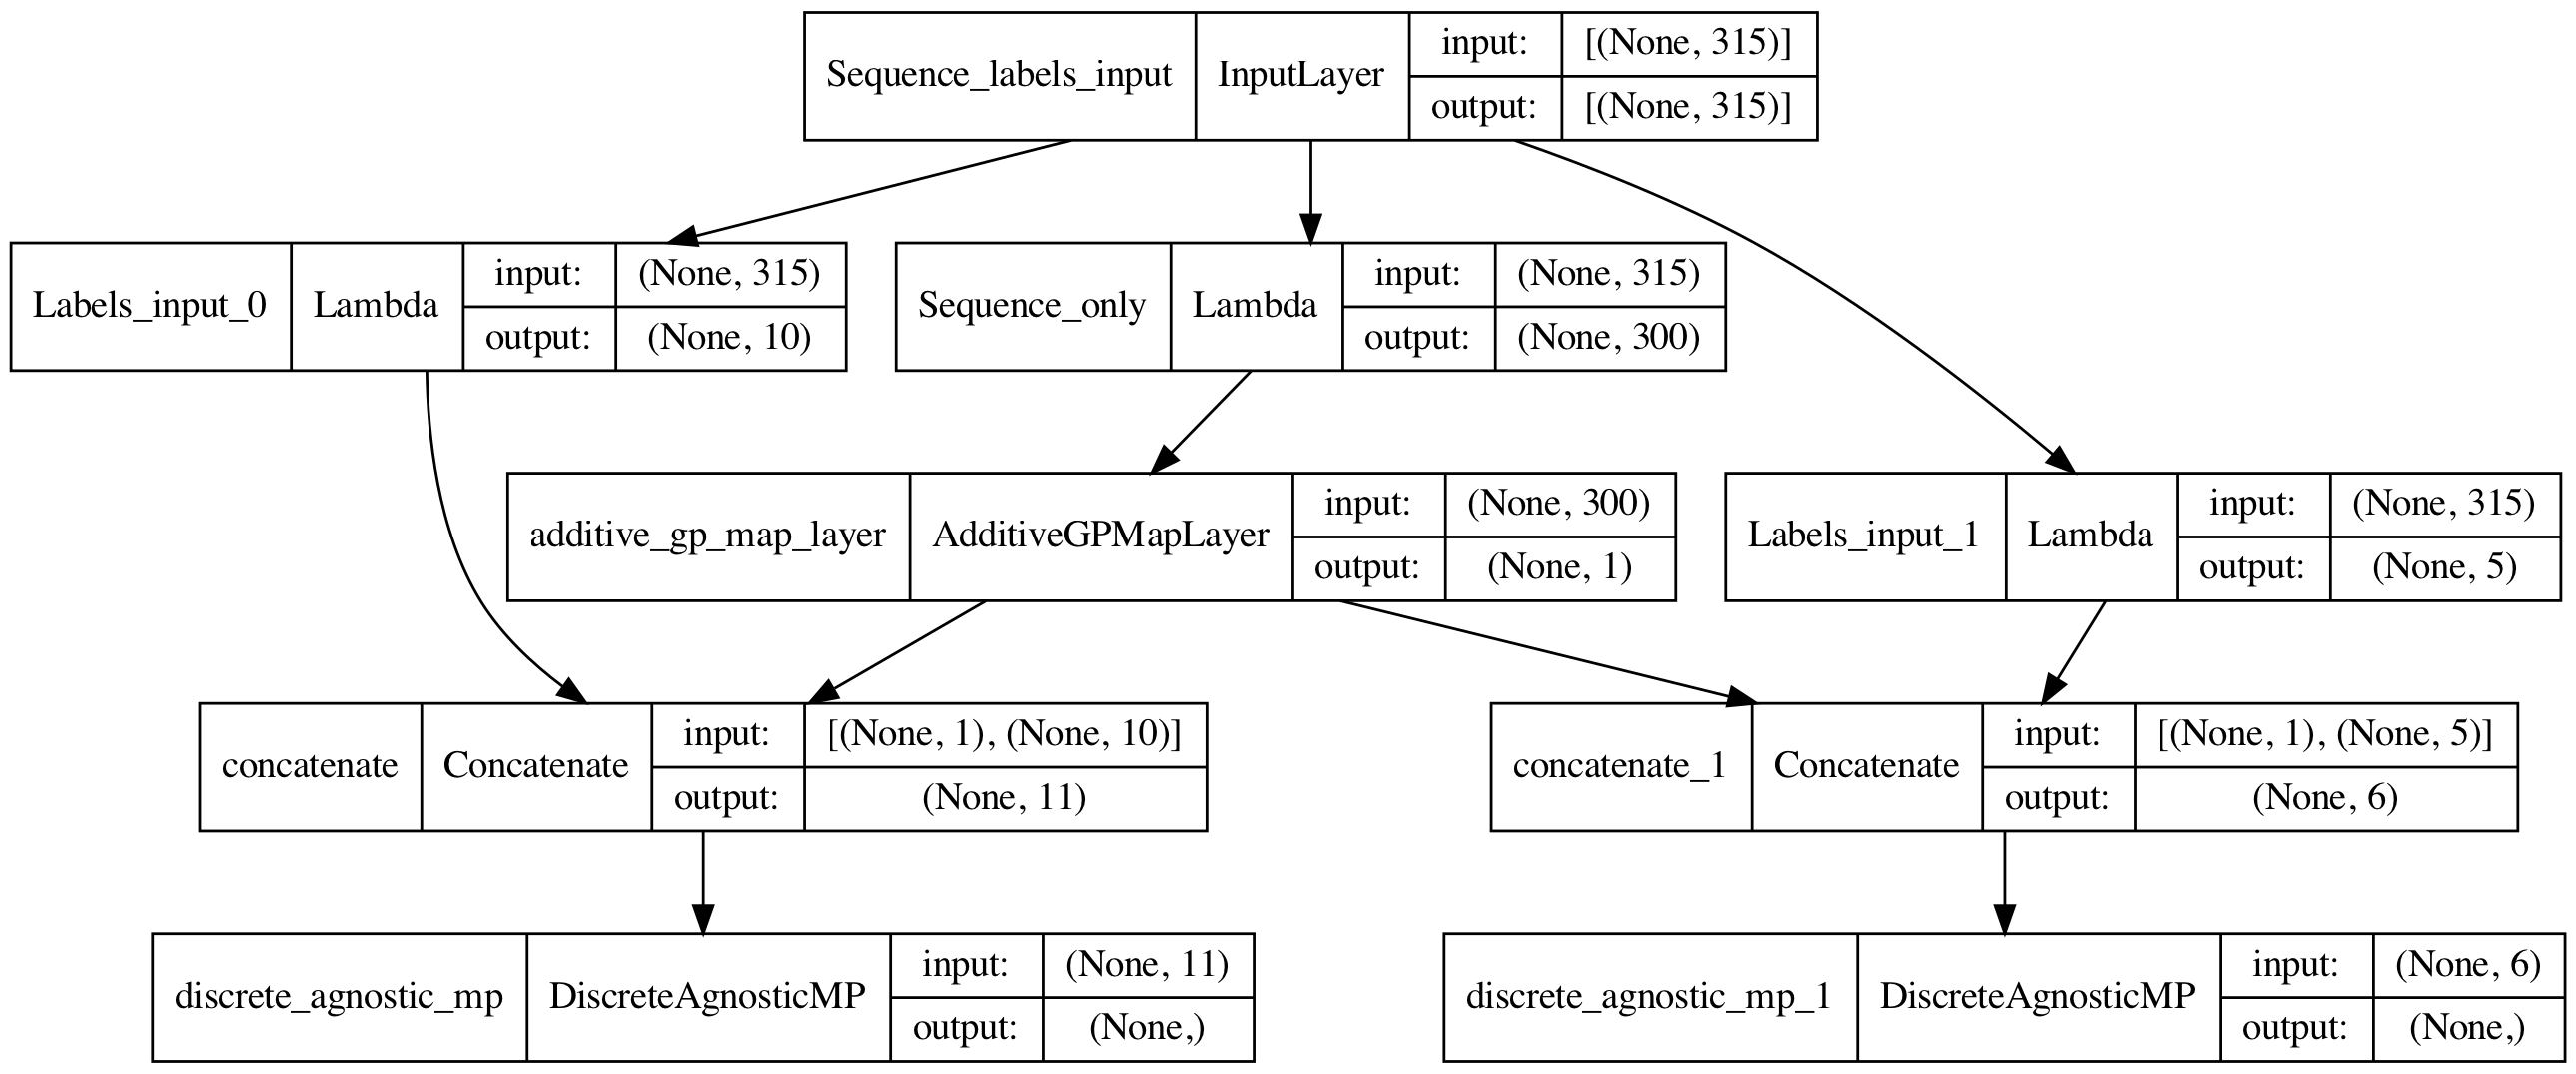

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='multiheaded_discrete_agnostic.png')

In [20]:

# Fit model to data
model.fit(learning_rate=.005,
          epochs=50,
          batch_size=1000,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/50
47/47 [==============================] - 2s 15ms/step - loss: 2772.7925 - discrete_agnostic_mp_loss: 2127.4890 - discrete_agnostic_mp_1_loss: 645.2890 - I_var: 0.0531 - val_loss: 2580.0811 - val_discrete_agnostic_mp_loss: 1997.9546 - val_discrete_agnostic_mp_1_loss: 582.1104 - val_I_var: 0.2298
Epoch 2/50
47/47 [==============================] - 0s 8ms/step - loss: 2438.4780 - discrete_agnostic_mp_loss: 1911.9641 - discrete_agnostic_mp_1_loss: 526.4955 - I_var: 0.4741 - val_loss: 2261.5239 - val_discrete_agnostic_mp_loss: 1800.9843 - val_discrete_agnostic_mp_1_loss: 460.5189 - val_I_var: 0.6662
Epoch 3/50
47/47 [==============================] - 0s 8ms/step - loss: 2272.4214 - discrete_agnostic_mp_loss: 1801.4121 - discrete_agnostic_mp_1_loss: 470.9877 - I_var: 0.6637 - val_loss: 2215.5603 - val_discrete_agnostic_mp_loss: 1766.6830 - val_discrete_agnostic_mp_1_loss: 448.8539 - val_I_var: 0.7069
Epoch 4/50
47/47 [==============================] - 0s 9ms/step - loss: 2248.1055

Epoch 28/50
47/47 [==============================] - 0s 7ms/step - loss: 2164.4731 - discrete_agnostic_mp_loss: 1727.4288 - discrete_agnostic_mp_1_loss: 436.9858 - I_var: 0.7815 - val_loss: 2123.6865 - val_discrete_agnostic_mp_loss: 1702.3077 - val_discrete_agnostic_mp_1_loss: 421.3203 - val_I_var: 0.8079
Epoch 29/50
47/47 [==============================] - 0s 9ms/step - loss: 2165.0774 - discrete_agnostic_mp_loss: 1728.7518 - discrete_agnostic_mp_1_loss: 436.2672 - I_var: 0.7872 - val_loss: 2121.8081 - val_discrete_agnostic_mp_loss: 1699.6997 - val_discrete_agnostic_mp_1_loss: 422.0500 - val_I_var: 0.8046
Epoch 30/50
47/47 [==============================] - 0s 8ms/step - loss: 2162.3372 - discrete_agnostic_mp_loss: 1725.6377 - discrete_agnostic_mp_1_loss: 436.6404 - I_var: 0.7853 - val_loss: 2125.0403 - val_discrete_agnostic_mp_loss: 1701.2664 - val_discrete_agnostic_mp_1_loss: 423.7148 - val_I_var: 0.7993
Epoch 31/50
47/47 [==============================] - 0s 8ms/step - loss: 2167.1

On test data:


Text(0.5, 1.0, 'training hisotry')

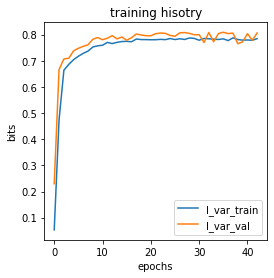

In [21]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')

In [22]:
phi = gpmap.x_to_phi(x_test)

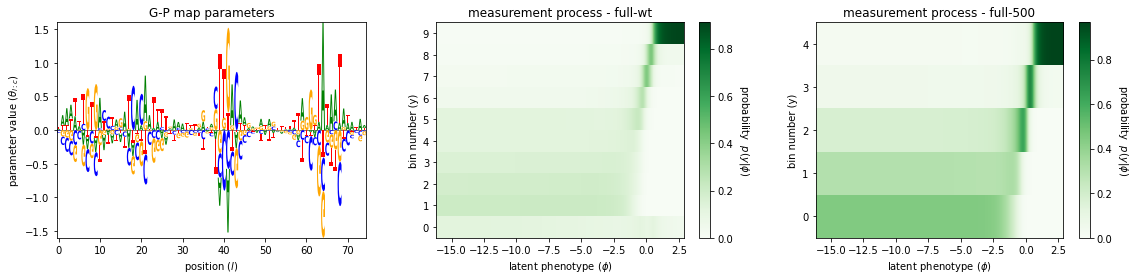

In [27]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
#phi_lim = [-5, 3]
phi_lim = [min(phi), max(phi)]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y_1 = 10    # Y = number of bins
y_lim_1 = [-.5, Y_1-.5]
y_all_1 = range(Y_1)

Y_2 = 5    # Y = number of bins
y_lim_2 = [-.5, Y_2-.5]
y_all_2 = range(Y_2)

# Compute matrix of p(y|phi) values
measurement_process_1 = full_wt_mp.p_of_y_given_phi(y_all_1, phi_grid)
measurement_process_2 = full_500_mp.p_of_y_given_phi(y_all_2, phi_grid)


#measurement_process = np.hstack([measurement_process_1,measurement_process_2,measurement_process_3])

# Create figure with two panels
fig, axs = plt.subplots(1,3,figsize=[16,4])

# Left panel: draw logo using logomaker
ax = axs[0]
logo = logomaker.Logo(pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters')

ax = axs[1]
im = ax.imshow(measurement_process_1,
               cmap='Greens',
               extent=phi_lim+y_lim_1,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all_1)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process - full-wt')
cb = plt.colorbar(im,ax=ax)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

ax = axs[2]
im = ax.imshow(measurement_process_2,
               cmap='Greens',
               extent=phi_lim+y_lim_2,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all_2)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process - full-500')
cb = plt.colorbar(im,ax=ax)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")



# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('sortseq_multiheaded_discrete_agnostic_visualization_full_wt_full_500.png',dpi=200,bbox_inches='tight')
plt.show()